In [150]:
import pandas as pd
import numpy as np
import statsmodels as sm
from statsmodels.tsa.statespace import sarimax
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import time

from typing import List, Dict
from gretel_client import configure_session

In [151]:
# Specify your Gretel API key

pd.set_option("max_colwidth", None)

configure_session(api_key="prompt", cache="yes", validate=True)


Caching Gretel config to disk.
Using endpoint https://api.gretel.cloud
Logged in as hoang.nd@orai.io ✅


In [152]:
# Load timeseries example to a dataframe

data_source = "https://gretel-public-website.s3.amazonaws.com/datasets/credit-timeseries-dataset.csv"
original_df = pd.read_csv(data_source)
original_df.to_csv("original.csv", index=False)
original_df


,net_amt,date,account_balance,credit_amt,district_id,debit_amt
0,50425.0,1995-04-30,485849.7,232833.8,77,182408.8
1,22260.4,1995-03-31,435424.7,269788.6,77,247528.2
2,94953.0,1995-02-28,413164.3,272404.2,77,177451.2
3,13419.3,1994-11-30,476239.2,209552.5,77,196133.2
4,-109497.2,1995-01-31,318211.3,209838.0,77,319335.2
...,...,...,...,...,...,...
5539,320044.0,1996-02-29,997363.3,659139.6,4,339095.6
5540,80647.8,1995-12-31,836115.8,434639.6,4,353991.8
5541,-158796.5,1996-01-31,677319.3,408007.3,4,566803.8
5542,44954.8,1996-03-31,1042318.1,453294.0,4,408339.2


In [153]:
# Gretel Transforms Configuration
config = """
schema_version: "1.0"
models:
    - transforms:
        data_source: "__tmp__"
        policies:
            - name: shiftnumbers
              rules:
                - name: shiftnumbers
                  conditions:
                    field_name:
                        - account_balance
                        - credit_amt
                        - debit_amt
                        - net_amt
                  transforms:
                    - type: numbershift
                      attrs:
                        min: 1
                        max: 100
                        field_name:
                            - date
                            - district_id
"""


In [154]:
# De-identify the original dataset using the policy above
import yaml

from gretel_client.projects import create_or_get_unique_project
from gretel_client.helpers import poll

# Create a project and model configuration.
project = create_or_get_unique_project(name="numbershift-transform")

model = project.create_model_obj(
    model_config=yaml.safe_load(config), data_source=data_source
)

# Upload the training data.  Train the model.
model.submit_cloud()
poll(model)

record_handler = model.create_record_handler_obj(data_source=data_source)
record_handler.submit_cloud()
poll(record_handler)

deid_df = pd.read_csv(record_handler.get_artifact_link("data"), compression="gzip")


INFO: Starting poller


{
    "uid": "633ff763ec698b6d8072488e",
    "guid": "model_2FnmzQ3kLaoLR3ModxbX6lDM7ug",
    "model_name": "enthusiastic-grandiose-wolf",
    "runner_mode": "cloud",
    "user_id": "633ff67bbff621779f449273",
    "user_guid": "user_2FnmWFhqEDJhOMwCmsPcFDdNX3q",
    "billing_domain": null,
    "billing_domain_guid": null,
    "project_id": "633ff74d44a4f15b630a351f",
    "project_guid": "proj_2FnmwfIx7oX7yUa3DKpWSaktQyH",
    "status_history": {
        "created": "2022-10-07T09:54:43.083103Z"
    },
    "last_modified": "2022-10-07T09:54:43.190509Z",
    "status": "created",
    "last_active_hb": null,
    "duration_minutes": null,
    "error_msg": null,
    "error_id": null,
    "traceback": null,
    "annotations": null,
    "container_image": "074762682575.dkr.ecr.us-west-2.amazonaws.com/gretelai/transforms@sha256:c9b59a72bc0f0d73111d7bc7e52a9c5b8cb6eb44734caa23dc02b1672fa7fc51",
    "container_image_version": "2.10.0",
    "model_type": "transform",
    "config": {
        "schema

INFO: Status is created. Model creation has been queued.
INFO: Status is pending. A Gretel Cloud worker is being allocated to begin model creation.
INFO: Status is active. A worker has started creating your model!
2022-10-07T09:54:59.223625Z  Starting transforms model training
2022-10-07T09:54:59.224349Z  Loading training data
2022-10-07T09:54:59.455682Z  Using up to 10000 records for training
2022-10-07T09:54:59.456110Z  Training data loaded
2022-10-07T09:54:59.456607Z  Beginning transforms model training
2022-10-07T09:55:23.642219Z  Saving model archive
2022-10-07T09:55:23.644390Z  Saving training report
2022-10-07T09:55:23.647861Z  Generating data preview with up to 100 records
2022-10-07T09:55:23.719638Z  Done generating data preview
2022-10-07T09:55:23.720824Z  Uploading artifacts to Gretel Cloud
2022-10-07T09:55:24.465169Z  Model creation complete!
INFO: Starting poller


{
    "uid": "633ff79fdae54ecd4ce57618",
    "guid": "model_run_2Fnn6vKNXwnPKkYq4NXS3uJqy0k",
    "model_name": null,
    "runner_mode": "cloud",
    "user_id": "633ff67bbff621779f449273",
    "user_guid": "user_2FnmWFhqEDJhOMwCmsPcFDdNX3q",
    "billing_domain": null,
    "billing_domain_guid": null,
    "project_id": "633ff74d44a4f15b630a351f",
    "project_guid": "proj_2FnmwfIx7oX7yUa3DKpWSaktQyH",
    "status_history": {
        "created": "2022-10-07T09:55:43.516000Z"
    },
    "last_modified": "2022-10-07T09:55:43.648000Z",
    "status": "created",
    "last_active_hb": null,
    "duration_minutes": null,
    "error_msg": null,
    "error_id": null,
    "traceback": null,
    "annotations": null,
    "container_image": "074762682575.dkr.ecr.us-west-2.amazonaws.com/gretelai/transforms@sha256:c9b59a72bc0f0d73111d7bc7e52a9c5b8cb6eb44734caa23dc02b1672fa7fc51",
    "container_image_version": "2.10.0",
    "model_id": "633ff763ec698b6d8072488e",
    "model_guid": "model_2FnmzQ3kLaoLR3

INFO: Status is pending. A Gretel Cloud worker is being allocated to begin transforming records.
INFO: Status is active. A worker has started!
2022-10-07T09:55:58.913042Z  Downloading model to worker
2022-10-07T09:56:03.582976Z  Loading model
2022-10-07T09:56:03.898386Z  Loading dataset to transform
2022-10-07T09:56:04.313508Z  Starting transform
2022-10-07T09:56:06.159915Z  Transform in progress
{
    "records_transformed": 5544,
    "new_records_transformed": 5544
}
2022-10-07T09:56:06.160460Z  Dataset transform complete
2022-10-07T09:56:06.398320Z  Uploading data to Gretel Cloud
2022-10-07T09:56:06.668961Z  Uploading run report to Gretel Cloud


In [155]:
# View the transformation report

import json
from smart_open import open

report = json.loads(open(model.get_artifact_link("report_json")).read())
pd.DataFrame(report["metadata"]["fields"])


,name,count,approx_distinct_count,missing_count,labels,attributes,entities,types
0,net_amt,5544,5453,0,[],[],[],"[{'type': 'number', 'count': 5544}]"
1,date,5544,72,0,[datetime],[],"[{'label': 'datetime', 'count': 5544, 'approx_distinct_count': 72, 'f_ratio': 1.0, 'sources': ['gretel/datetime']}]","[{'type': 'string', 'count': 5544}]"
2,account_balance,5544,5465,0,[],[],[],"[{'type': 'number', 'count': 5544}]"
3,credit_amt,5544,5466,0,[],[],[],"[{'type': 'number', 'count': 5544}]"
4,district_id,5544,77,0,[],[],"[{'label': 'location', 'count': 4896, 'approx_distinct_count': 68, 'f_ratio': 0.8831168831168831, 'sources': ['gretel/location']}]","[{'type': 'number', 'count': 5544}]"
5,debit_amt,5544,5319,0,[],[],[],"[{'type': 'number', 'count': 5544}]"


In [156]:
# Here we sort and remove "net_amt" as it's a derived column,
# We will add back in after the data is synthesized
train_df = deid_df.copy()

train_df.sort_values("date", inplace=True)
train_cols = list(train_df.columns)
train_cols.remove("net_amt")
train_df = train_df.filter(train_cols)

# Here we noticed that some number have extremely long precision,
# so we round the data
train_df = train_df.round(1)
train_df.to_csv("train.csv", index=False)
train_df


,date,account_balance,credit_amt,district_id,debit_amt
1814,1993-01-31,1132.0,1132.0,52,32.0
5392,1993-01-31,91.0,91.0,2,91.0
3888,1993-01-31,264.0,264.0,23,64.0
1509,1993-01-31,30.0,30.0,56,30.0
1106,1993-01-31,6010.5,6010.5,62,66.0
...,...,...,...,...,...
5086,1998-12-31,2044862.7,827593.8,3,692353.7
169,1998-12-31,5873315.7,3070591.4,74,2491755.5
3228,1998-12-31,1599165.1,525864.4,30,462125.0
4743,1998-12-31,2266274.9,1086885.0,9,1010709.2


In [164]:
from gretel_client.projects.models import read_model_config

# Create a project and model configuration.
project = create_or_get_unique_project(name="ts-5544-regular-seed")

# Pull down the default synthetic config.  We will modify it slightly.
config = read_model_config("synthetics/default")

# Set up the seed fields
seed_fields = ["date", "district_id"]

task = {
    "type": "seed",
    "attrs": {
        "fields": seed_fields,
    },
}

# Fine tune model parameters. These are the parameters we found to work best.  This is "Run 20" in the document
config["models"][0]["synthetics"]["task"] = task

config["models"][0]["synthetics"]["params"]["vocab_size"] = 20
config["models"][0]["synthetics"]["params"]["learning_rate"] = 0.005
config["models"][0]["synthetics"]["params"]["epochs"] = 100
config["models"][0]["synthetics"]["params"]["gen_temp"] = 0.8
config["models"][0]["synthetics"]["params"]["reset_states"] = True
config["models"][0]["synthetics"]["params"]["dropout_rate"] = 0.5
config["models"][0]["synthetics"]["params"]["gen_temp"] = 0.8
config["models"][0]["synthetics"]["params"]["early_stopping"] = True
config["models"][0]["synthetics"]["privacy_filters"]["similarity"] = None
config["models"][0]["synthetics"]["privacy_filters"]["outliers"] = None
config["models"][0]["synthetics"]["generate"]["num_records"] = train_df.shape[0]

# Get a csv to work with, just dump out the train_df.
deid_df.to_csv("train.csv", index=False)

# Initiate a new model with the chosen config
model = project.create_model_obj(model_config=config, data_source="train.csv")

# Upload the training data.  Train the model.
model.submit_cloud()
poll(model)

synthetic = pd.read_csv(model.get_artifact_link("data_preview"), compression="gzip")
synthetic


In [158]:
# Add back in the derived column "net_amt"
net_amt = synthetic["credit_amt"] - synthetic["debit_amt"]
synthetic["net_amt"] = net_amt

# Save off the new synthetic data
synthetic.to_csv("synthetic.csv", index=False, header=True)


In [159]:
# View the Synthetic Performance Report
import IPython
from smart_open import open

IPython.display.HTML(data=open(model.get_artifact_link("report")).read(), metadata=dict(isolated=True))


Synthetic Data Use Cases,Excellent,Good,Moderate,Poor,Very Poor
Significant tuning required to improve model,,,,,"<path fill-rule=""evenodd"" clip-rule=""evenodd"" d=""M1.99999 21.6C2.49999 21.9 2.99999 22 3.49999 22H20.5C21.3 22 22 21.7 22.5 21.1C23.1 20.6 23.4 19.8 23.4 19C23.4 18.5 23.3 18 23 17.5L14.6 3.40002C14.1 2.70002 13.5 2.20002 12.7 2.00002C11.9 1.80002 11.1 1.90002 10.4 2.30002C9.99999 2.50002 9.69999 2.90002 9.39999 3.30002L0.899987 17.5C0.0999871 18.9 0.599987 20.8 1.99999 21.6ZM11 13C11 13.6 11.4 14 12 14C12.6 14 13 13.6 13 13V9C13 8.4 12.6 8 12 8C11.4 8 11 8.4 11 9V13ZM11.3 17.7C11.5 17.9 11.7 18 12 18C12.3 18 12.5 17.9 12.8 17.7C13 17.5 13.1 17.3 13.1 17C13.1 16.95 13.075 16.875 13.05 16.8C13.025 16.725 13 16.65 13 16.6C13 16.5 12.9 16.4 12.8 16.3C12.7 16.3 12.6 16.2 12.6 16.2C12.5425 16.1425 12.5181 16.1181 12.4887 16.1077C12.4669 16.1 12.4425 16.1 12.4 16.1C12.3425 16.0425 12.3181 16.0181 12.2887 16.0077C12.2669 16 12.2425 16 12.2 16C12 16 11.8 16 11.6 16.1C11.5 16.1 11.4 16.2 11.3 16.3C11.25 16.35 11.225 16.4 11.2 16.45C11.175 16.5 11.15 16.55 11.1 16.6C11 16.7 11 16.9 11 17C11 17.3 11.1 17.5 11.3 17.7Z"" fill=""#E6A21A""/>"
Improve your model using our tips and advice,,,,,
Demo environments or mock data,,,,,
Pre-production testing environments,,,,,
Balance or augment machine learning data sources,,,,,
Machine learning or statistical analysis,,,,,
Data Sharing Use Case,Excellent,Very Good,Good,Normal,Poor
"Internally, within the same team",,,,,
"Internally, across different teams",,,,,
"Externally, with trusted partners",,,,,


<Figure size 640x480 with 0 Axes>

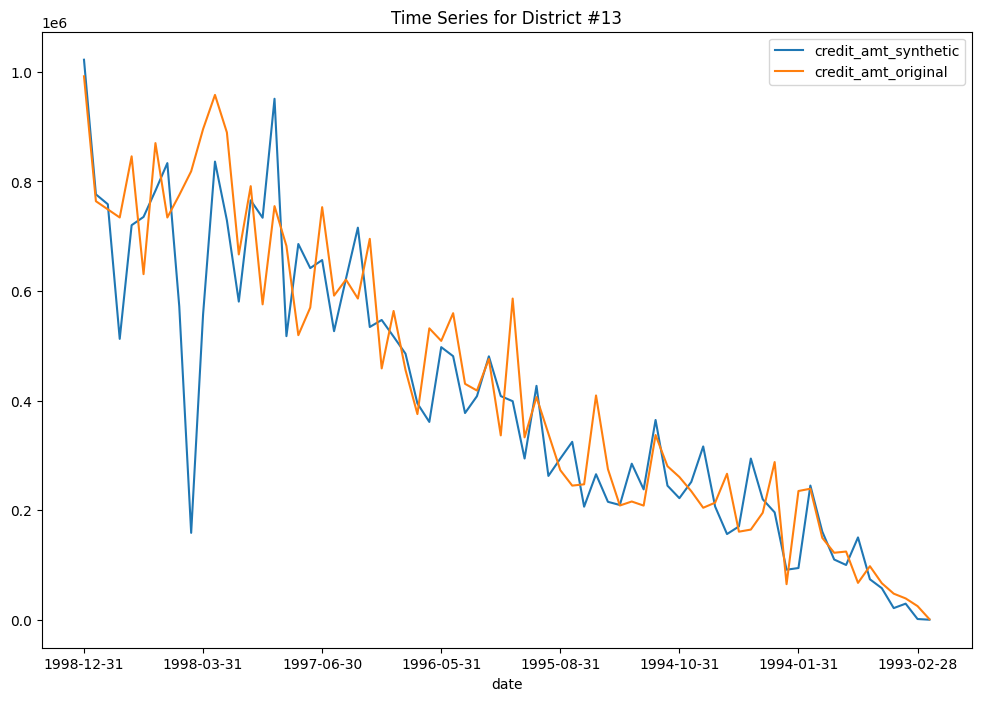

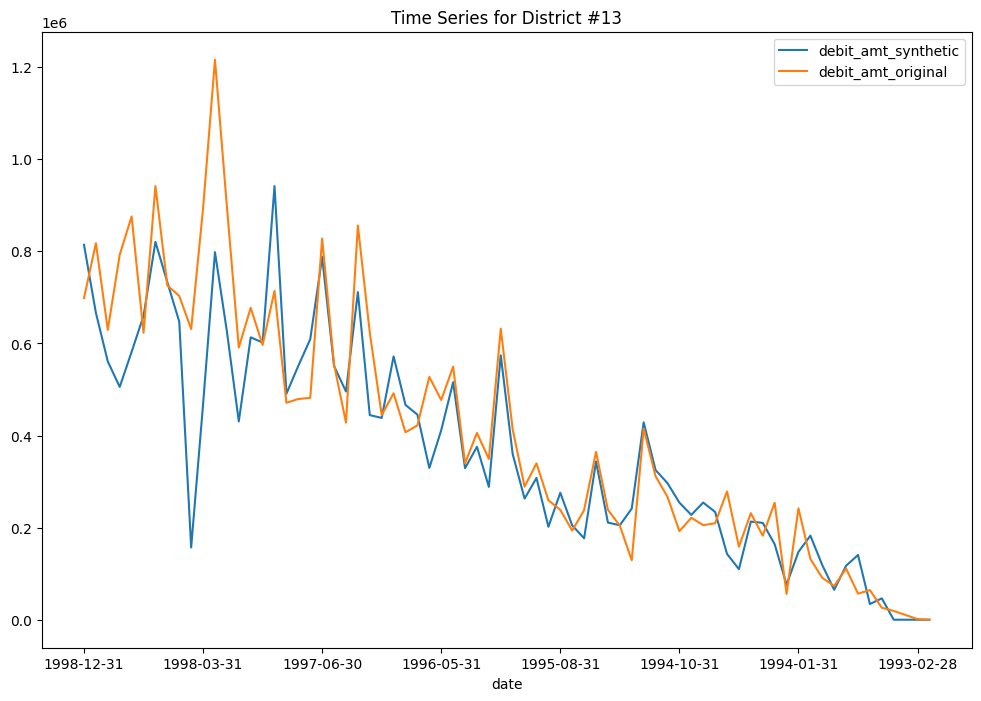

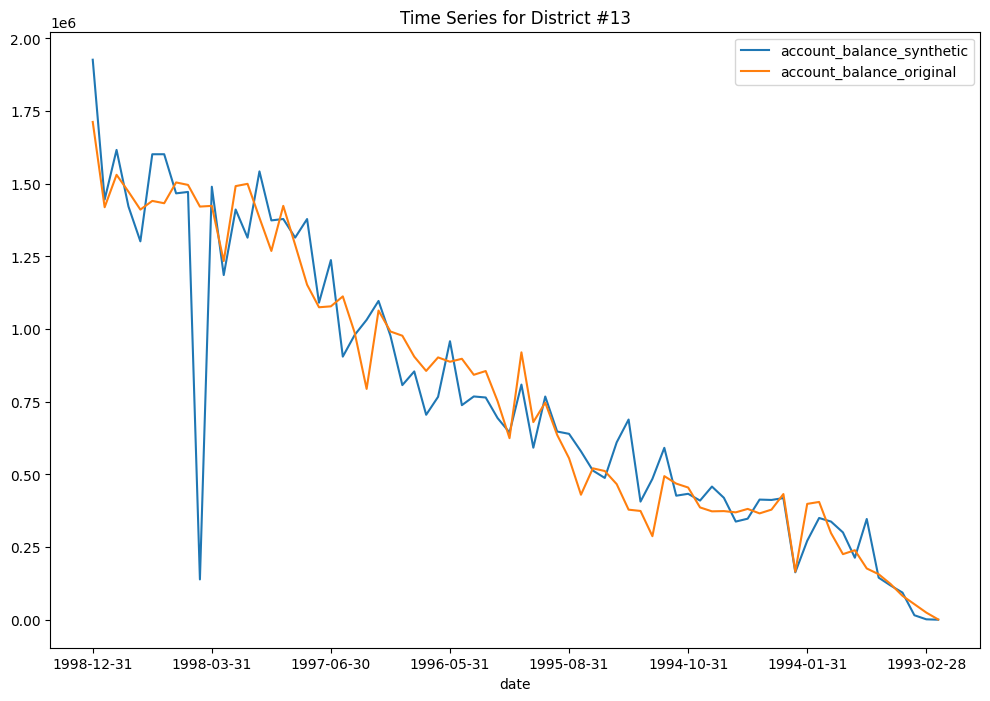

In [160]:
import matplotlib
import matplotlib.pyplot as plt


def plot_district_averages(
    synthetic: pd.DataFrame, training: pd.DataFrame, district_id: int
) -> pd.DataFrame:

    synthetic_data = synthetic.loc[synthetic["district_id"] == district_id]
    synthetic_data = synthetic_data.set_index("date")

    training_data = training.loc[training["district_id"] == district_id]
    training_data = training_data.set_index("date")

    combined = synthetic_data.join(
        training_data, lsuffix="_synthetic", rsuffix="_original"
    )
    plt.suptitle("District #" + str(district_id))

    for col in ["credit_amt", "debit_amt", "account_balance"]:
        fig = combined.plot(y=[f"{col}_synthetic", f"{col}_original"], figsize=(12, 8))
        plt.title("Time Series for District #" + str(district_id))

    return combined


combined = plot_district_averages(synthetic, train_df, 13)


In [161]:
import warnings

warnings.filterwarnings("ignore")


def ARIMA_run(
    data_paths: List[str],
    targets: List[str] = None,
    entity_column: str = "district_id",
    entities: List = None,
    date_column: str = "date",
    date_threshold: str = None,
) -> Dict[str, List[float]]:
    """
    Purpose of this function is to automate the run and scoring of SARIMAX models, so we can benchmark results against various different synthetic data configurations.
    The data paths from s3 are passed in, and then entire run, from loading in and sorting the data to creating a model and scoring it, is done via this function.
    The outputs are the target scores for each variable on each dataset's model. This gets used to create bar charts of the RMSE.
    With some fine tuning, this function can be made as a general purpose SARIMAX benchmark function for a variety of datasets.

    Args:
      data_paths: a list of paths to the data you want to create models and score with. These can be either local paths or ones from public buckets.
      targets: Which columns in the data will be your target variables?
      entity_column: This is purely used for datasets that have multiple time series data points from multiple places. Since this function was built with that in mind, it assumes that you will
      give a column that denotes those different places/entities. If None is provided, no handler has been built yet that can handle that.
      entities: This should be a list of the set of entities within the entity column.
      date_column: This should be something we can use to sort the data, so that the time series is read appropriately.
      date_threshold: This is to split the data into train and test. Whatever date you want to threshold by to make the train and test should be specified here.

    Outputs:
      target_scores: This will be a dictionary of RMSE scores for each target variable on each synthetic dataset.
    """
    target_scores = {}
    for target in targets:
        target_scores[target] = []
    for path in data_paths:
        sorted_data = pd.read_csv(path)
        sorted_data.sort_values(date_column, inplace=True)
        sorted_data.drop_duplicates(subset=[date_column, entity_column], inplace=True)

        print("Path: {}".format(path))
        for entity in entities:
            print("Entity: {}".format(entity))
            for target in targets:
                train_data = sorted_data[sorted_data[entity_column] == entity][
                    sorted_data[date_column] < date_threshold
                ]
                test_data = sorted_data[sorted_data[entity_column] == entity][
                    sorted_data[date_column] >= date_threshold
                ]

                model = sarimax.SARIMAX(
                    train_data[target], order=(0, 1, 1), seasonal_order=(1, 1, 0, 12)
                )
                res = model.fit()

                preds = res.forecast(len(test_data[target]))
                rmse = mean_squared_error(test_data[target], preds, squared=False)
                target_scores[target].append(rmse)
                print("Target: {}".format(target))
                print("RMSE: {}".format(rmse))

    return target_scores


In [162]:
target_scores = ARIMA_run(
    ["synthetic.csv", "original.csv"],
    targets=["net_amt", "account_balance", "credit_amt", "debit_amt"],
    entities=[13],
    date_threshold="1998-01-01",
)
target_scores


Path: synthetic.csv
Entity: 13
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.92380D+00    |proj g|=  6.04405D-02

At iterate    5    f=  9.88911D+00    |proj g|=  1.70441D-03

At iterate   10    f=  9.88869D+00    |proj g|=  2.75726D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   2.757D-06   9.889D+00
  F =   9.8886884951329890     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Target: net_amt
RMSE: 77560.2874588106


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   2.113D-06   1.019D+01
  F =   10.194425423151740     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Target: account_balance
RMSE: 381044.8365023571
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00354D+01    |proj g|=  4.10560D-02

At iterate    5    f=  1.00322D+01    |proj g|=  8.10018D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of functi

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.85733D+00    |proj g|=  2.20063D-03

At iterate   10    f=  9.85574D+00    |proj g|=  4.66972D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   1.949D-06   9.856D+00
  F =   9.8557312476751182     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Target: net_amt
RMSE: 108404.54767158673
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.81723D+00    |proj g|=  6.97792D-02

At iterate    5    f=  9.802

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.97290D+00    |proj g|=  4.16965D-02

At iterate    5    f=  9.96615D+00    |proj g|=  1.66581D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.809D-06   9.966D+00
  F =   9.9661523095727649     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Target: debit_amt
RMSE: 151182.292681637


{'net_amt': [77560.2874588106, 108404.54767158673],
 'account_balance': [381044.8365023571, 174944.6034805266],
 'credit_amt': [299274.2979194784, 131771.15677012125],
 'debit_amt': [260690.81648916894, 151182.292681637]}

<AxesSubplot: title={'center': 'RMSE per field and run in synthetic timeseries'}, xlabel='method'>

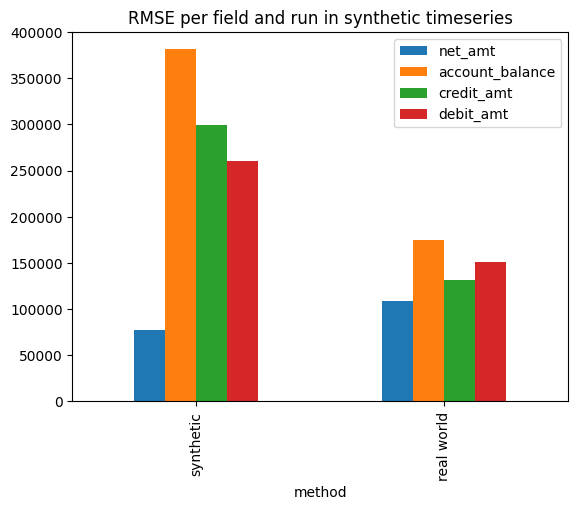

In [163]:
import plotly.express as px

results = pd.DataFrame.from_dict(target_scores)
results["method"] = ["synthetic", "real world"]
results.plot.bar(x="method", title="RMSE per field and run in synthetic timeseries")
